In [1]:
import numpy as np # numerical computation
import pandas as pd # # data processing/manipulation
import matplotlib.pyplot as plt # basic data visualization
# import seaborn as sns # nicer data visualization
import time

# stopwords, tokenizer, stemmer
import nltk  
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

import re # regular expressions

import gensim #new nltk library for language processing
from gensim.parsing.preprocessing import remove_stopwords # we also use gensim for stopwords removal

from textblob import TextBlob

C:\Users\Lu Xinyi\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import sys

In [3]:
pd.options.display.max_colwidth = 1000 #by default, Python will likely display only the first 50 characters from a long text
#pd.options.display.float_format = '{:20,.f}'.format
pd.options.display.float_format = '{:,.2f}'.format

### Read Data

In [21]:
tweets_df = pd.read_csv('sample_cleaned.csv',)
tweets_df.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0,0,-2147483648,1536,Golden Valley Arizona,46.30,-109.17,NaN,United States,North America,Montana,MT,en,this is how biden made his trumpisnotamerica,"['', 'biden', 'made', 'trumpisnotamerica', '']",biden
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1,0,-2147483648,390,"California, USA",36.70,-118.76,NaN,United States,North America,California,CA,en,censorship hunterbiden biden bidenemails bidenemail corruption,"['censorship', 'hunterbiden', 'biden', 'bidenemail', 'bidenemail', 'corrupt', '']",biden
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0,0,19940334,1397,"Chicago, Illinois",41.88,-87.62,Chicago,United States,North America,Illinois,IL,en,in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump but ccp from china or porn on twitter that s always been fine for is sick,"['2020', 'nypost', 'censorship', 'censor', 'twitter', 'manipul', 'u', 'elect', 'favor', 'joebiden', 'trump', 'ccp', 'china', 'porn', 'twitter', 'alway', 'fine', 'sick', '']",biden
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0,0,-2147483648,266,"Kentucky, USA",37.57,-85.16,NaN,United States,North America,Kentucky,KY,en,fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden,"['fbi', 'allegedli', 'obtain', 'hunter', 'biden', 'comput', 'data', 'ukrain', 'deal', 'report', 'claim', 'joebiden', 'hunterbiden', '']",biden
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",0,0,101659277,83,"Tampa, Florida",27.95,-82.46,Tampa,United States,North America,Florida,FL,en,comments on this do democrats understand how ruthless china is china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade,"['comment', 'democrat', 'understand', 'ruthless', 'china', 'china', 'hunterbiden', 'joebiden', 'bidenharri', 'bidenharris2020', 'trumppence2020', 'trump', 'realdonaldtrump', 'wto', 'coronaviru', 'trade', '']",biden


In [22]:
tweets_df.head(10)[['tweet', 'tweet_new']]

,tweet,tweet_new
0,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,this is how biden made his trumpisnotamerica
1,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,censorship hunterbiden biden bidenemails bidenemail corruption
2,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump but ccp from china or porn on twitter that s always been fine for is sick
3,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden
4,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",comments on this do democrats understand how ruthless china is china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade
5,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",in an effort to find the truth about allegations that isn t allowing people to share the link to a article about hunter biden this is what popped up nypost hunterbiden biden election2020
6,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,twitter is doing everything they can to help democrats win the election making sure nobody sees a negative story about biden only negative stories on trump twittercensorship biden ukraine hunterbiden
7,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,joebiden calls him a lier and then insults him for being overweight biden shows his low iq daily maybe joe should hold town halls in kindergarten he ll be amongst equals and no one will say anything when he takes his afternoon nap
8,#Trump is tearing up #Biden at the #TrumpRally over the #HunterBidenEmails,trump is tearing up biden at the trumprally over the hunterbidenemails
9,#Trump #Obama #Clinton #Biden\n\n#ManWomanPersonCameraTV\n\n#RockPaperScissors\n\n#HandsFaceSpace\n\n#VoteJoeBiden \n\n#USElection #USElection2020\n\n#Pence vs #Harris\n\n#DrugsTest #TrumpDrugs #BidenDrugs\n\n#InjectDisinfectant #PowerfulLight through the skin or some other way 😳🙆🏽‍♂️🤷🏽‍♂️🤦🏽‍♂️ https://t.co/tBqSpgWoR0,trump obama clinton biden manwomanpersoncameratv rockpaperscissors handsfacespace votejoebiden uselection uselection2020 pence vs harris drugstest trumpdrugs bidendrugs injectdisinfectant powerfullight through the skin or some other way


### TextBlob analysis

In [23]:
# Helper Function to assign Label for Sentiment Analysis with TextBlob
def create_sentiment_labels(value):
    '''
    in: 
        value on which to classify
    out: 
        return the sentiment class
    '''
    if value > 0:
        return 'positive'
    elif value == 0:
        return 'neutral'
    else:
        return 'negative'

In [24]:
# Polarity and subjectivity
def sentiment_analysis(df):
    dataframe = df.copy()
    dataframe['blob_polarity'] = dataframe['tweet_new'].apply(lambda x: TextBlob(x).sentiment.polarity)
    dataframe['blob_subjectivity'] = dataframe['tweet_new'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    dataframe['blob_sentiment'] = dataframe['blob_polarity'].apply(create_sentiment_labels)
    return dataframe

In [25]:
tweets_df = sentiment_analysis(tweets_df)
tweets_df.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,continent,state,state_code,tweet_lang,tweet_new,tweet_token,ds,blob_polarity,blob_subjectivity,blob_sentiment
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0,0,-2147483648,1536,Golden Valley Arizona,46.30,-109.17,NaN,...,North America,Montana,MT,en,this is how biden made his trumpisnotamerica,"['', 'biden', 'made', 'trumpisnotamerica', '']",biden,0.00,0.00,neutral
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1,0,-2147483648,390,"California, USA",36.70,-118.76,NaN,...,North America,California,CA,en,censorship hunterbiden biden bidenemails bidenemail corruption,"['censorship', 'hunterbiden', 'biden', 'bidenemail', 'bidenemail', 'corrupt', '']",biden,0.00,0.00,neutral
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0,0,19940334,1397,"Chicago, Illinois",41.88,-87.62,Chicago,...,North America,Illinois,IL,en,in 2020 nypost is being censorship censored by twitter to manipulate a us election in favor of joebiden and against trump but ccp from china or porn on twitter that s always been fine for is sick,"['2020', 'nypost', 'censorship', 'censor', 'twitter', 'manipul', 'u', 'elect', 'favor', 'joebiden', 'trump', 'ccp', 'china', 'porn', 'twitter', 'alway', 'fine', 'sick', '']",biden,-0.15,0.68,negative
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0,0,-2147483648,266,"Kentucky, USA",37.57,-85.16,NaN,...,North America,Kentucky,KY,en,fbi allegedly obtained hunter biden computer data on ukraine dealings report claims joebiden hunterbiden,"['fbi', 'allegedli', 'obtain', 'hunter', 'biden', 'comput', 'data', 'ukrain', 'deal', 'report', 'claim', 'joebiden', 'hunterbiden', '']",biden,-0.10,0.10,negative
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",0,0,101659277,83,"Tampa, Florida",27.95,-82.46,Tampa,...,North America,Florida,FL,en,comments on this do democrats understand how ruthless china is china hunterbiden joebiden bidenharris bidenharris2020 trumppence2020 trump realdonaldtrump wto coronavirus trade,"['comment', 'democrat', 'understand', 'ruthless', 'china', 'china', 'hunterbiden', 'joebiden', 'bidenharri', 'bidenharris2020', 'trumppence2020', 'trump', 'realdonaldtrump', 'wto', 'coronaviru', 'trade', '']",biden,-1.00,1.00,negative


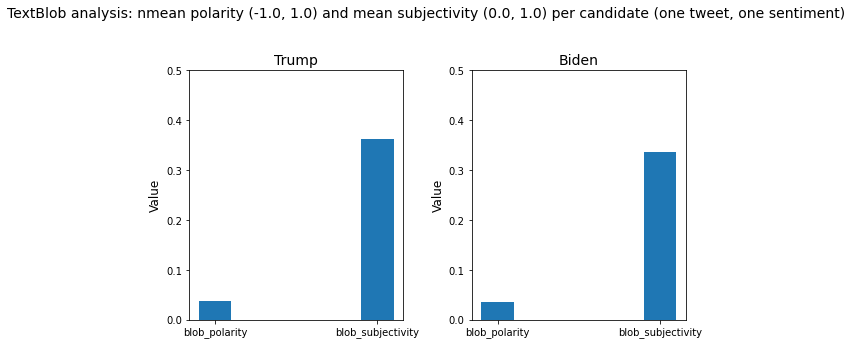

In [26]:
#update the divided dataset
trump_df = tweets_df[tweets_df.ds=='trump']
biden_df = tweets_df[tweets_df.ds=='biden']

fig, axes = plt.subplots(1, 2, figsize=(8,5))

fig.suptitle('TextBlob analysis: nmean polarity (-1.0, 1.0) and mean subjectivity (0.0, 1.0) per candidate (one tweet, one sentiment)', fontsize=14)

features = ['blob_polarity', 'blob_subjectivity']
values = [trump_df.groupby(['user_id'])['blob_polarity'].mean().mean(), trump_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[0].bar(features,values, width=0.2)
axes[0].set_ylim(0, .5)
axes[0].set_title('Trump', fontsize = 14)
axes[0].set_ylabel('Value', fontsize = 12)

values = [biden_df.groupby(['user_id'])['blob_polarity'].mean().mean(), biden_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[1].bar(features,values, width=0.2)
axes[1].set_ylim(0, .5)
axes[1].set_title('Biden', fontsize = 14)
axes[1].set_ylabel('Value', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

trump_usa_pol_tweet =trump_df['blob_polarity'].mean()
trump_usa_subj_tweet = trump_df['blob_subjectivity'].mean()
biden_usa_pol_tweet = biden_df['blob_polarity'].mean()
biden_usa_subj_tweet = biden_df['blob_subjectivity'].mean()

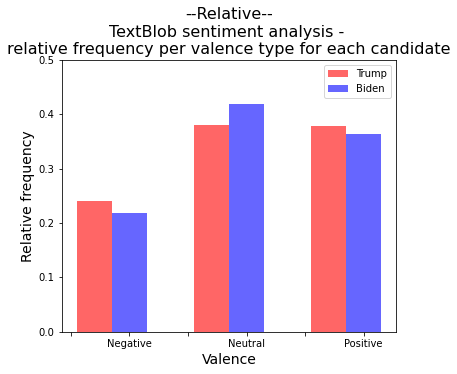

In [27]:
plt.figure(figsize=(6,5))

ax = plt.gca()
ax.set_title('--Relative--\nTextBlob sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])
trump = (trump_df['blob_sentiment'].sort_values().value_counts()/trump_df['blob_sentiment'].shape[0])[['negative', 'neutral', 'positive']]
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha= .6)

biden = (biden_df['blob_sentiment'].sort_values().value_counts()/biden_df['blob_sentiment'].shape[0])[['negative', 'neutral', 'positive']]
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha= .6)

ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Relative frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

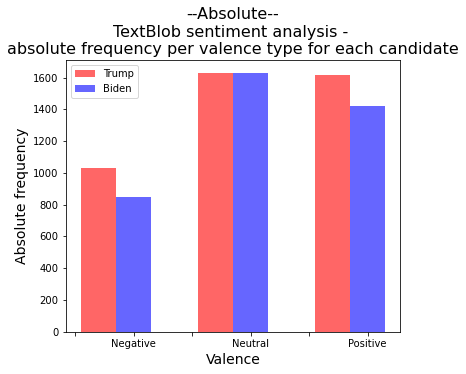

In [28]:
plt.figure(figsize=(6,5))

ax = plt.gca()
ax.set_title('--Absolute--\nTextBlob sentiment analysis - \nabsolute frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])
trump = (trump_df['blob_sentiment'].sort_values().value_counts())[['negative', 'neutral', 'positive']]
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha=0.6)

biden = (biden_df['blob_sentiment'].sort_values().value_counts())[['negative', 'neutral', 'positive']]
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha = 0.6)

#ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Absolute frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Vader Sentiment Analysis

In [30]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
# Run the analysis on clean and unclean data and it is recommended

[nltk_data] Downloading package vader_lexicon to C:\Users\Lu
[nltk_data]     Xinyi\AppData\Roaming\nltk_data...


In [31]:
def sentiment_analysis_vader(data, clean = True):
    df = data.copy()
    if clean:
        target_col = 'tweet_new'
        prefix = 'vader_clean_'
    else:
        target_col = 'tweet'
        prefix = 'vader_'
    
    scores_col = prefix+'scores'
    
    #let's make it vader_sentiment, so that it has the same naming convention as TextBlob and Flair sentiment score
    #compound_col = prefix+'compound'
    compound_col = prefix+'polarity'
    
    #comp_score_col = prefix+'comp_score'
    comp_score_col = prefix+'sentiment' 
    
    df[scores_col] = df[target_col].apply(lambda tweet: sid.polarity_scores(tweet))
    df[compound_col] = df[scores_col].apply(lambda d: d['compound'])
    df[comp_score_col] = df[compound_col].apply(create_sentiment_labels)
    return df

In [32]:
tweets_vader = sentiment_analysis_vader(tweets_df)
tweets_vader = sentiment_analysis_vader(tweets_vader, clean=False)
tweets_vader.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0,0,-2147483648,1536,Golden Valley Arizona,46.30,-109.17,NaN,...,biden,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
1,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1,0,-2147483648,390,"California, USA",36.70,-118.76,NaN,...,biden,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0,0,19940334,1397,"Chicago, Illinois",41.88,-87.62,Chicago,...,biden,-0.15,0.68,negative,"{'neg': 0.141, 'neu': 0.76, 'pos': 0.099, 'compound': -0.4019}",-0.40,negative,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'compound': -0.4137}",-0.41,negative
3,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0,0,-2147483648,266,"Kentucky, USA",37.57,-85.16,NaN,...,biden,-0.10,0.10,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
4,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ",0,0,101659277,83,"Tampa, Florida",27.95,-82.46,Tampa,...,biden,-1.00,1.00,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral


In [33]:
trump_df = tweets_vader[tweets_vader.ds=='trump']
biden_df = tweets_vader[tweets_vader.ds=='biden']
print(trump_df.shape, biden_df.shape)

(4274, 27) (3895, 27)


In [34]:
def get_valence_relative_freq(data):
    df = data.copy()
    grouped = df.groupby(['vader_sentiment'])
    valence = grouped['vader_sentiment'].value_counts(normalize=False, sort=False)
    valence = valence.droplevel(0)
    valence = valence / valence.sum()
    return valence

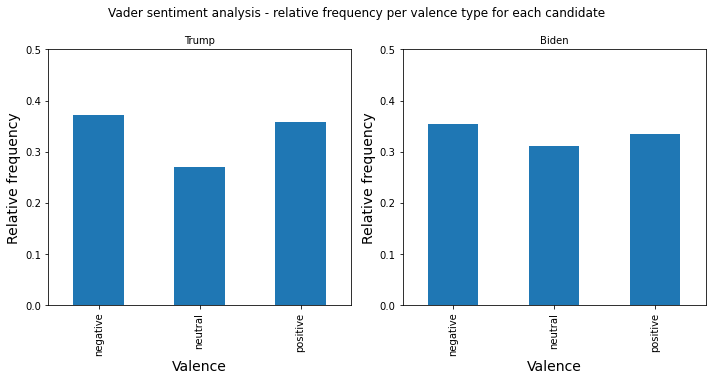

In [57]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
pd.options.display.max_colwidth = 300

trump_tmp = get_valence_relative_freq(trump_df)
biden_tmp = get_valence_relative_freq(biden_df)

#plt.figure(figsize=(8,6))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Vader sentiment analysis - relative frequency per valence type for each candidate', fontsize=12, y=1.05)
#fig.tight_layout()

#sns.barplot(trump_tmp.index, trump_tmp.values, ax=axes[0])
(trump_tmp).plot(kind='bar', ax = axes[0])
axes[0].set_title('Trump', fontsize = 10)
axes[0].set_xlabel('Valence', fontsize = 14)
axes[0].set_ylabel('Relative frequency', fontsize = 14)
axes[0].set_ylim(0, .5)

#ax2 = sns.countplot(x="comp_score", data=biden_tmp)
#sns.barplot(biden_tmp.index, biden_tmp.values,  ax=axes[1])
(biden_tmp).plot(kind='bar', ax = axes[1])
axes[1].set_title('Biden', fontsize = 10)
axes[1].set_xlabel('Valence', fontsize = 14)
axes[1].set_ylabel('Relative frequency', fontsize = 14)
axes[1].set_ylim(0, .5)

plt.tight_layout()
plt.show()

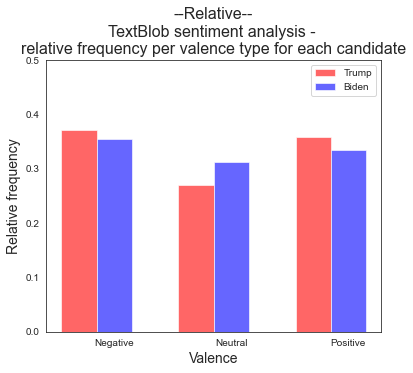

In [58]:
plt.figure(figsize=(6,5))
sns.set_style("white")

ax = plt.gca()
ax.set_title('--Relative--\nTextBlob sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])

trump = get_valence_relative_freq(trump_df)
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha= .6)

biden = get_valence_relative_freq(biden_df)
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha= .6)

ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Relative frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Average sentiment score per candidate

-0.011322976134768348
-0.009924775353016665


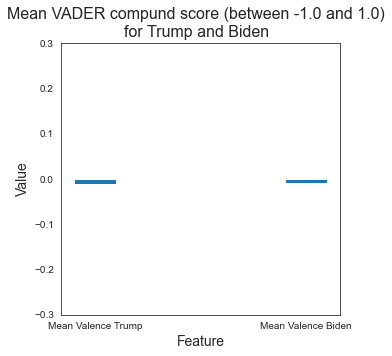

In [59]:
print(trump_df['vader_polarity'].mean())
print(biden_df['vader_polarity'].mean())

fig = plt.figure(figsize=(5,5))

fig.suptitle('Mean VADER compund score (between -1.0 and 1.0)\nfor Trump and Biden', fontsize=16)

features = ['Mean Valence Trump', 'Mean Valence Biden']
values = [trump_df['vader_polarity'].mean(), biden_df['vader_polarity'].mean()]

plt.bar(features,values, width=0.2)

axes = plt.gca()
axes.set_ylim(-.3, .3)
axes.set_xlabel('Feature', fontsize = 14)
axes.set_ylabel('Value', fontsize = 14)

plt.show()

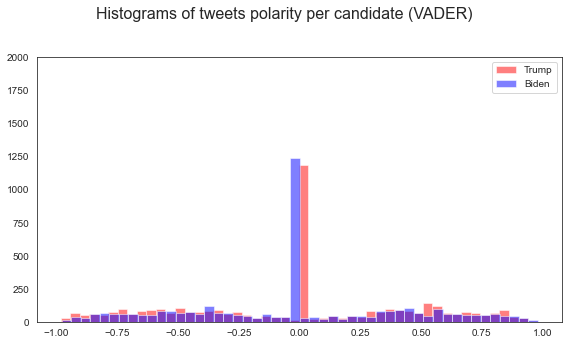

In [61]:
bins = 50

fig = plt.figure(figsize=(8,5))
fig.suptitle('Histograms of tweets polarity per candidate (VADER)', fontsize=16)

plt.hist(trump_df['vader_polarity'], bins = bins, alpha = 0.5, color = 'r')
plt.hist(biden_df['vader_polarity'], bins = bins, alpha = 0.5, color = 'b')

axes = plt.gca()
axes.set_ylim(0, 2000)
labels= ["Trump", "Biden"]
axes.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Sentiment analysis on data per week

In [118]:
week1 = pd.read_csv('sample_week1.csv')
week2 = pd.read_csv('sample_week2.csv')
week3 = pd.read_csv('sample_week3.csv')
print(week1.shape, week2.shape, week3.shape)

(6283, 18) (5792, 18) (5288, 18)


In [119]:
week1_sentiments = sentiment_analysis(week1)
week1_sentiments = sentiment_analysis_vader(week1_sentiments)
week1_sentiments = sentiment_analysis_vader(week1_sentiments, clean=False)
week1_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-18 20:45:17,@latimes #trump tried to be extra #orange today since he was going to #OrangeCounty #Newport today!,0,0,74664635,205,"California, USA",36.70,-118.76,NaN,...,trump,0.00,0.10,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
1,2020-10-17 21:39:15,"#Trump mocks #Biden at rally about using notes and reading off stuff....5MIN LATER...#Trump pulls out a sheet of paper and proceeds to ""read"" from it....#ijs",0,0,1938571818,110,Texas,31.82,-99.51,NaN,...,trump,0.00,0.00,neutral,"{'neg': 0.101, 'neu': 0.842, 'pos': 0.057, 'compound': -0.3182}",-0.32,negative,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.4588}",-0.46,negative
2,2020-10-16 01:51:36,"#Trump evasive as usual—saying “possibly I did, possibly I didn’t.”\n#BidenTownHall https://t.co/5uf6WjZiNy",0,0,410941088,1973,"Virginia, USA",37.12,-78.49,NaN,...,trump,-0.08,0.75,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
3,2020-10-15 00:48:02,"@JackPosobiec It would be nice if he would actually go after Twitter, Facebook, YouTube, and all other Big Tech enemies of the state, instead of just talking about it. #Trump",0,0,186467957,1676,"Los Angeles, CA",34.05,-118.24,Los Angeles,...,trump,0.12,0.39,positive,"{'neg': 0.097, 'neu': 0.818, 'pos': 0.085, 'compound': -0.1027}",-0.10,negative,"{'neg': 0.094, 'neu': 0.824, 'pos': 0.082, 'compound': -0.1027}",-0.10,negative
4,2020-10-16 22:56:51,"""Why Do #White #Christians Vote #Republican, While #Black Christians Vote #Democrat?"" Insightful #PhilVischer Video. #Trump #MAGA #racist @LandP1776 https://t.co/gmfqIxKva5",0,0,1122821040,2873,"Atlantic City, NJ",39.36,-74.42,Atlantic City,...,trump,-0.08,0.22,negative,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.6124}",-0.61,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral


In [120]:
week2_sentiments = sentiment_analysis(week2)
week2_sentiments = sentiment_analysis_vader(week2_sentiments)
week2_sentiments = sentiment_analysis_vader(week2_sentiments, clean=False)
week2_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-23 01:51:42,@StaceyBell_Lynn No he isn't. Don't listen to the Lyin'King aka #Trump,0,0,-2147483648,206,"Long Beach, NY",40.59,-73.66,NaN,...,trump,0.00,0.00,neutral,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}",-0.30,negative,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.296}",-0.30,negative
1,2020-10-22 16:10:59,@sarahcpr #LeslieStahl grabbed #DonaldTrump by the pussy. \nTurns out he is not a fan. \n\n#grabembythepussy,0,0,41596521,65,Maryland,39.52,-76.94,NaN,...,trump,0.00,0.00,neutral,"{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.2411}",-0.24,negative,"{'neg': 0.131, 'neu': 0.869, 'pos': 0.0, 'compound': -0.2411}",-0.24,negative
2,2020-10-21 07:59:26,@funder @MeredthSalenger @MaryLTrump What I wish Biden would say in a debate #TrumpMeltdown #trump #lyingsackofshit https://t.co/VY8XTlr8O2,0,0,112877659,24,"Erlanger, KY",39.02,-84.60,NaN,...,trump,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}",0.40,positive,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}",0.40,positive
3,2020-10-24 08:41:34,"We aren't going to get this virus under control unless we shut down everything again. As a person with type 1 diabetes I feel like I'm being targeted for genocide. I was born with this, why is Trump pushing for herd immunity? Kill the old and the weak? Adolf #DonaldTrump",1,1,182781523,1625,"Elk Grove, CA",38.41,-121.37,NaN,...,trump,-0.14,0.37,negative,"{'neg': 0.146, 'neu': 0.806, 'pos': 0.048, 'compound': -0.7269}",-0.73,negative,"{'neg': 0.149, 'neu': 0.804, 'pos': 0.047, 'compound': -0.755}",-0.76,negative
4,2020-10-22 23:07:20,#Trump just handed Biden a devastating debate attack. https://t.co/ErhoN4zgmE #Obamacare #BidenHarris2020 He had NO plan.,0,0,-2147483648,10490,Las Vegas • New York • International,36.15,-115.16,Las Vegas,...,trump,-1.00,1.00,negative,"{'neg': 0.49, 'neu': 0.51, 'pos': 0.0, 'compound': -0.8625}",-0.86,negative,"{'neg': 0.484, 'neu': 0.516, 'pos': 0.0, 'compound': -0.8842}",-0.88,negative


In [121]:
week3_sentiments = sentiment_analysis(week3)
week3_sentiments = sentiment_analysis_vader(week3_sentiments)
week3_sentiments = sentiment_analysis_vader(week3_sentiments, clean=False)
week3_sentiments.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,...,ds,blob_polarity,blob_subjectivity,blob_sentiment,vader_clean_scores,vader_clean_polarity,vader_clean_sentiment,vader_scores,vader_polarity,vader_sentiment
0,2020-10-31 21:16:36,"@Scaramucci Those ppl that claim @JoeBiden is socialist, that they R fighting against socialism by voting for #Trump. 1 Q, Who do u think paid for #Trump’s Covid 19 medicine &amp; hospital stay? Americans did by way of a socialist process that protects the POTUS no matter what.",0,0,-2147483648,60,"Vancouver, Washington",45.63,-122.67,Vancouver,...,trump,0.00,0.00,neutral,"{'neg': 0.104, 'neu': 0.82, 'pos': 0.075, 'compound': -0.3182}",-0.32,negative,"{'neg': 0.098, 'neu': 0.832, 'pos': 0.071, 'compound': -0.3182}",-0.32,negative
1,2020-11-01 00:13:55,"@PamBondi @realDonaldTrump @TeamTrump @TrumpWomensTour Is that Don Jr on cocaine? At least the Bidens are honest about H.B.'s PRIOR addiction struggle.\n\nThe #GOP &amp; #Trump family projection about drugs, abuse of power, needing your family name to be relevant, etc. is staggering. Take an hon...",2,0,201969761,11,Florida,27.76,-81.46,NaN,...,trump,0.08,0.68,positive,"{'neg': 0.158, 'neu': 0.732, 'pos': 0.11, 'compound': -0.4404}",-0.44,negative,"{'neg': 0.148, 'neu': 0.749, 'pos': 0.103, 'compound': -0.4404}",-0.44,negative
2,2020-10-28 06:41:06,NOT “Rounding the Bend on #COVID19”\n\nClaim is simply not true say ALL mainstream #MedicalProfessionals. @JoeBiden has #Plan.\n\nWant less #Violence? @JoeBiden is ONLY candidate willing to work w parties &amp; fight #SystemicRacism.\n#Trump doesn’t believe in it.\n\n#Warminster #Newtown https:/...,0,0,-2147483648,131,"Pennsylvania, USA",40.97,-77.73,NaN,...,trump,-0.02,0.62,negative,"{'neg': 0.195, 'neu': 0.715, 'pos': 0.089, 'compound': -0.6946}",-0.69,negative,"{'neg': 0.11, 'neu': 0.801, 'pos': 0.089, 'compound': -0.234}",-0.23,negative
3,2020-11-02 19:46:48,#Trump #ElectionDay #thehammer #scorecard #USElections2020,0,0,-2147483648,5480,"Texas, USA",31.82,-99.51,NaN,...,trump,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
4,2020-10-30 11:28:33,Get up!\nGet out!\nVote for #Trump to save America 🇺🇸,0,0,-2147483648,215,"West Palm Beach, FL",26.72,-80.05,West Palm Beach,...,trump,0.00,0.00,neutral,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.4939}",0.49,positive,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.5837}",0.58,positive


In [122]:
### group by to get average sentiment score
week1_sentiments['created_at'] = pd.to_datetime(week1_sentiments['created_at'])
week1_grouped = week1_sentiments.groupby([week1_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
week2_sentiments['created_at'] = pd.to_datetime(week2_sentiments['created_at'])
week2_grouped = week2_sentiments.groupby([week2_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
week3_sentiments['created_at'] = pd.to_datetime(week3_sentiments['created_at'])
week3_grouped = week3_sentiments.groupby([week3_sentiments['created_at'].dt.date, 'ds'])['vader_polarity'].mean().reset_index()
week1_grouped

,created_at,ds,vader_polarity
0,2020-10-15,biden,0.00
1,2020-10-15,trump,-0.08
2,2020-10-16,biden,0.09
3,2020-10-16,trump,-0.01
4,2020-10-17,biden,0.00
5,2020-10-17,trump,-0.04
6,2020-10-18,biden,-0.01
7,2020-10-18,trump,-0.01
8,2020-10-19,biden,0.03
9,2020-10-19,trump,-0.05


In [123]:
polarity_grouped = pd.concat([week1_grouped, week2_grouped, week3_grouped], ignore_index=True)
polarity_grouped

,created_at,ds,vader_polarity
0,2020-10-15,biden,0.00
1,2020-10-15,trump,-0.08
2,2020-10-16,biden,0.09
3,2020-10-16,trump,-0.01
4,2020-10-17,biden,0.00
5,2020-10-17,trump,-0.04
6,2020-10-18,biden,-0.01
7,2020-10-18,trump,-0.01
8,2020-10-19,biden,0.03
9,2020-10-19,trump,-0.05


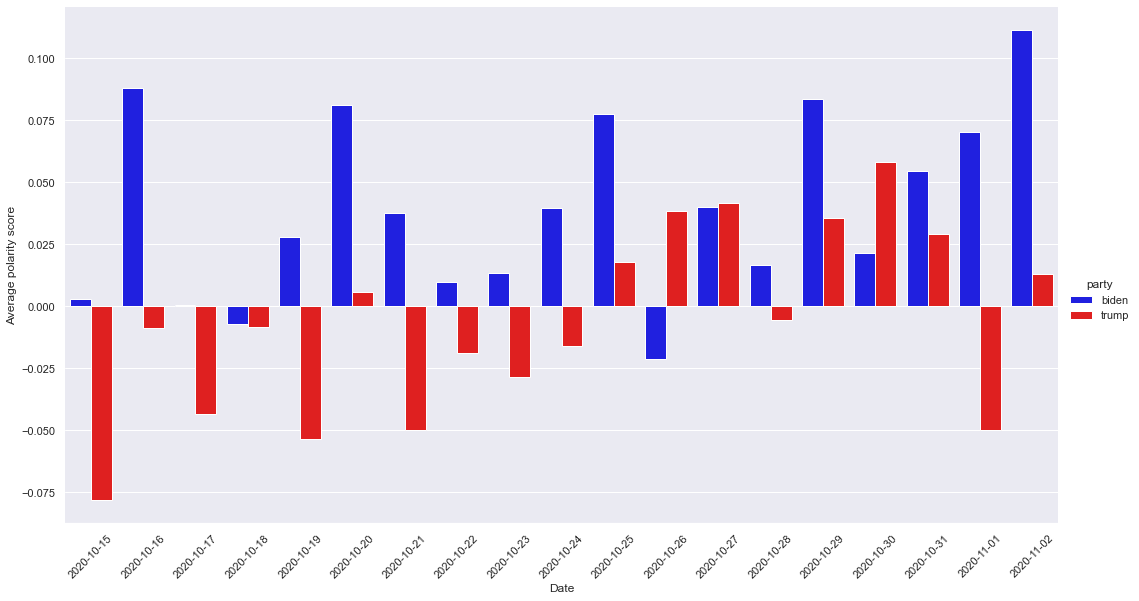

In [125]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = polarity_grouped, 
               kind = 'bar', 
               x = 'created_at', y = 'vader_polarity', hue = 'ds', 
                height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('Date', 'Average polarity score')
g._legend.set_title('party')
g.set_xticklabels(rotation=45)

In [126]:
#proportion of positive/negative tweets
week1_count = week1_sentiments.groupby([week1_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
week1_total = week1_sentiments.groupby([week1_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
week1_df = week1_count.merge(week1_total, how = 'left', on = ['created_at', 'ds'])
week1_df['proportion_ds'] = week1_df['count']/week1_df['total_ds']
week1_positive = week1_df[week1_df['vader_sentiment'] == 'positive']
week1_positive

,created_at,ds,vader_sentiment,count,total_ds,proportion_ds
2,2020-10-15,biden,positive,236,683,0.35
5,2020-10-15,trump,positive,183,564,0.32
8,2020-10-16,biden,positive,425,940,0.45
11,2020-10-16,trump,positive,314,845,0.37
14,2020-10-17,biden,positive,216,565,0.38
17,2020-10-17,trump,positive,177,505,0.35
20,2020-10-18,biden,positive,162,467,0.35
23,2020-10-18,trump,positive,205,555,0.37
26,2020-10-19,biden,positive,215,551,0.39
29,2020-10-19,trump,positive,209,608,0.34


In [127]:
#proportion of positive/negative tweets
week2_sentiments['created_at'] = pd.to_datetime(week2_sentiments['created_at'])
week2_count = week2_sentiments.groupby([week2_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
week2_total = week2_sentiments.groupby([week2_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
week2_df = week2_count.merge(week2_total, how = 'left', on = ['created_at', 'ds'])
week2_df['proportion_ds'] = week2_df['count']/week2_df['total_ds']
week2_positive = week2_df[week2_df['vader_sentiment'] == 'positive']
week2_positive

,created_at,ds,vader_sentiment,count,total_ds,proportion_ds
2,2020-10-20,biden,positive,123,300,0.41
5,2020-10-20,trump,positive,118,322,0.37
8,2020-10-21,biden,positive,118,317,0.37
11,2020-10-21,trump,positive,104,329,0.32
14,2020-10-22,biden,positive,155,395,0.39
17,2020-10-22,trump,positive,126,357,0.35
20,2020-10-23,biden,positive,399,1064,0.38
23,2020-10-23,trump,positive,291,839,0.35
26,2020-10-24,biden,positive,115,303,0.38
29,2020-10-24,trump,positive,119,335,0.36


In [128]:
#proportion of positive/negative tweets
week3_count = week3_sentiments.groupby([week3_sentiments['created_at'].dt.date, 'ds', 'vader_sentiment']).size().reset_index().rename(columns={0:'count'})
week3_total = week3_sentiments.groupby([week3_sentiments['created_at'].dt.date, 'ds']).size().reset_index().rename(columns={0: 'total_ds'})
week3_df = week3_count.merge(week3_total, how = 'left', on = ['created_at', 'ds'])
week3_df['proportion_ds'] = week3_df['count']/week3_df['total_ds']
week3_positive = week3_df[week3_df['vader_sentiment'] == 'positive']
week3_positive

,created_at,ds,vader_sentiment,count,total_ds,proportion_ds
2,2020-10-27,biden,positive,126,321,0.39
5,2020-10-27,trump,positive,139,354,0.39
8,2020-10-28,biden,positive,144,416,0.35
11,2020-10-28,trump,positive,145,382,0.38
14,2020-10-29,biden,positive,145,340,0.43
17,2020-10-29,trump,positive,131,307,0.43
20,2020-10-30,biden,positive,117,325,0.36
23,2020-10-30,trump,positive,145,319,0.45
26,2020-10-31,biden,positive,137,336,0.41
29,2020-10-31,trump,positive,111,266,0.42


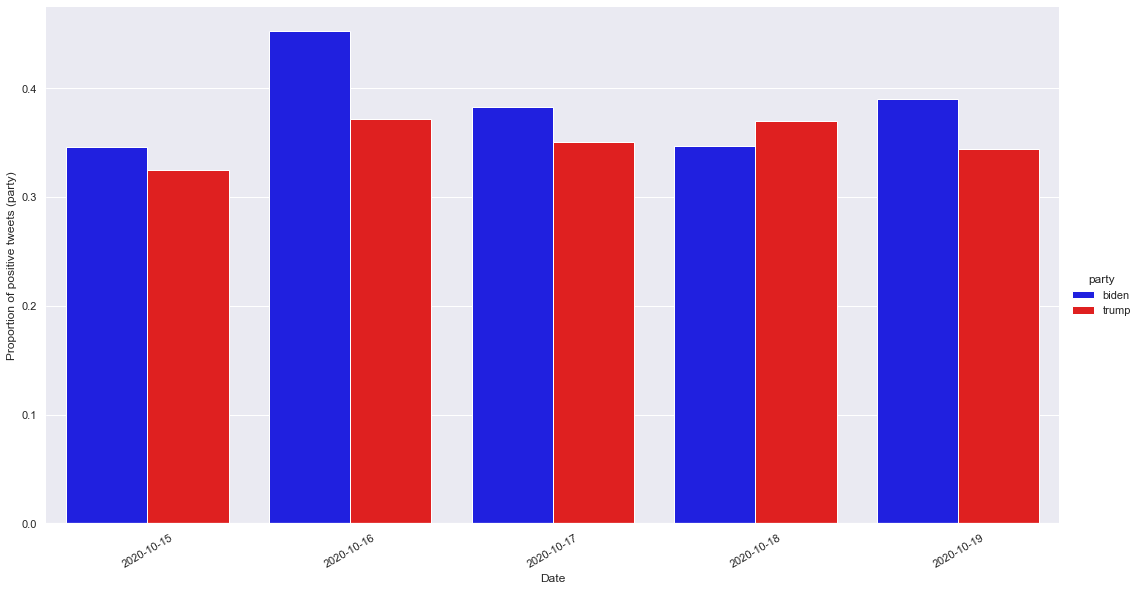

In [129]:
import seaborn as sns

colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week1_positive, 
               kind = 'bar', 
               x = 'created_at', y = 'proportion_ds', hue = 'ds', 
                height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('Date', 'Proportion of positive tweets (party)')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)

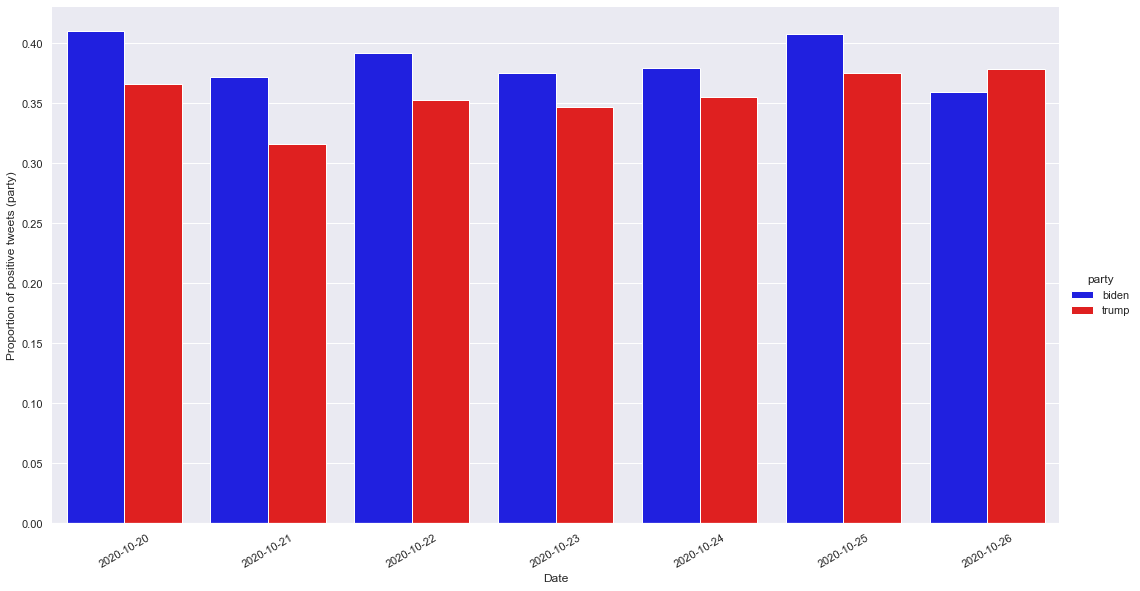

In [130]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week2_positive, 
               kind = 'bar', 
               x = 'created_at', y = 'proportion_ds', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('Date', 'Proportion of positive tweets (party)')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)

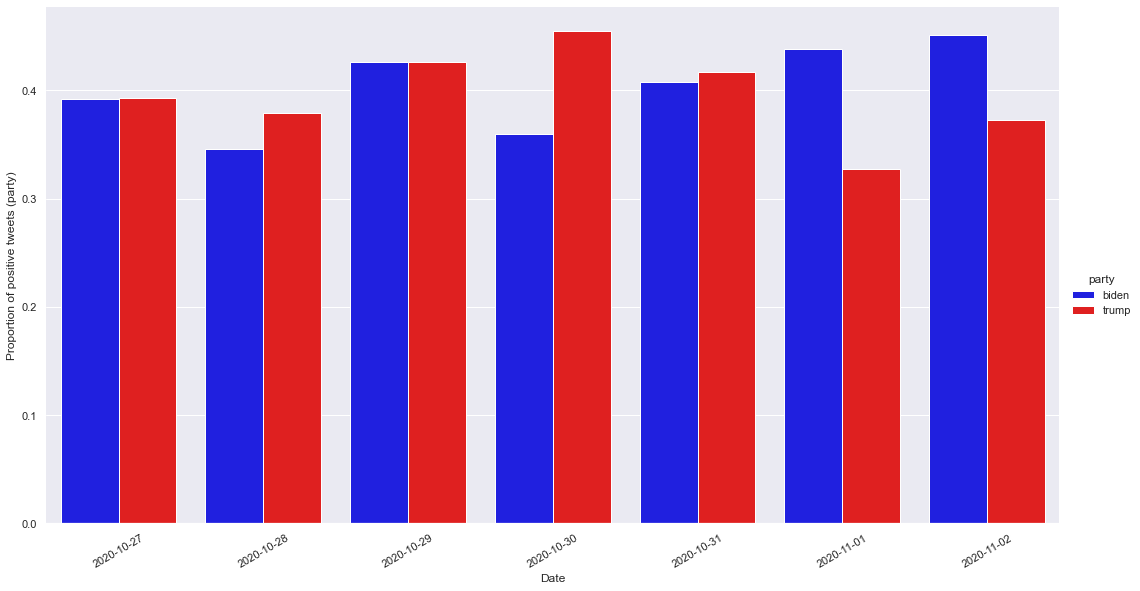

In [131]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week3_positive, 
               kind = 'bar', 
               x = 'created_at', y = 'proportion_ds', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('Date', 'Proportion of positive tweets (party)')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)

**Sentiments by state and party**

In [137]:
week1_state = week1_sentiments.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
week2_state = week2_sentiments.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
week3_state = week3_sentiments.groupby(['ds', 'state_code'])['vader_polarity'].mean().reset_index()
week1_state

,ds,state_code,vader_polarity
0,biden,AK,0.11
1,biden,AL,0.00
2,biden,AR,-0.08
3,biden,AZ,0.05
4,biden,CA,0.01
...,...,...,...
100,trump,VT,0.08
101,trump,WA,0.00
102,trump,WI,-0.07
103,trump,WV,-0.11


Text(0.5, 0.98, 'Distribution of polarity by state (Oct 15 - 19)')

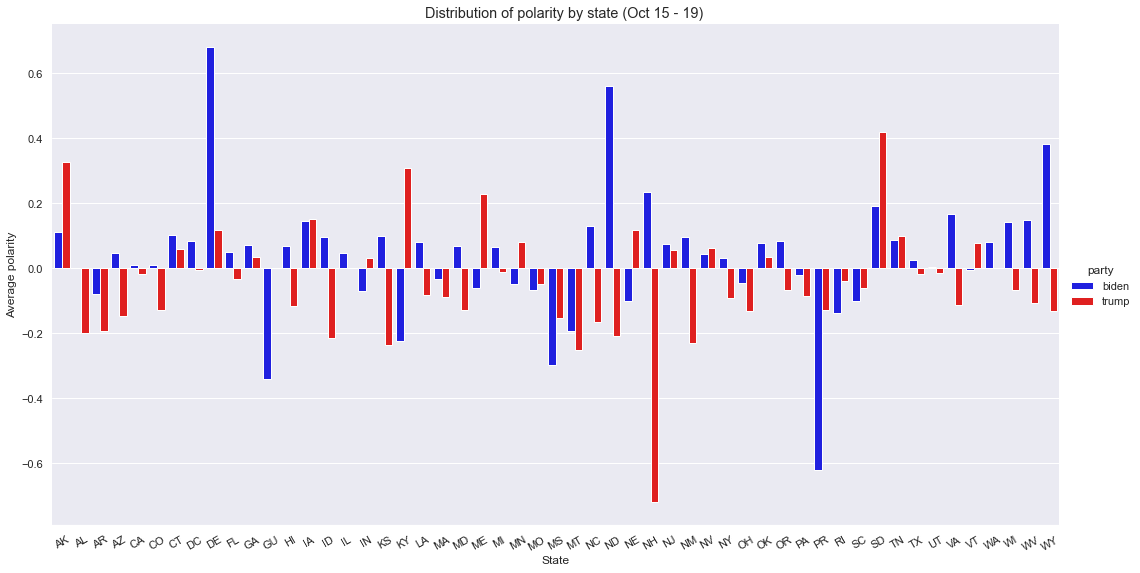

In [146]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week1_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of polarity by state (Oct 15 - 19)')

Text(0.5, 0.98, 'Distribution of sentiment polarity by state (Oct 20 - Oct 26)')

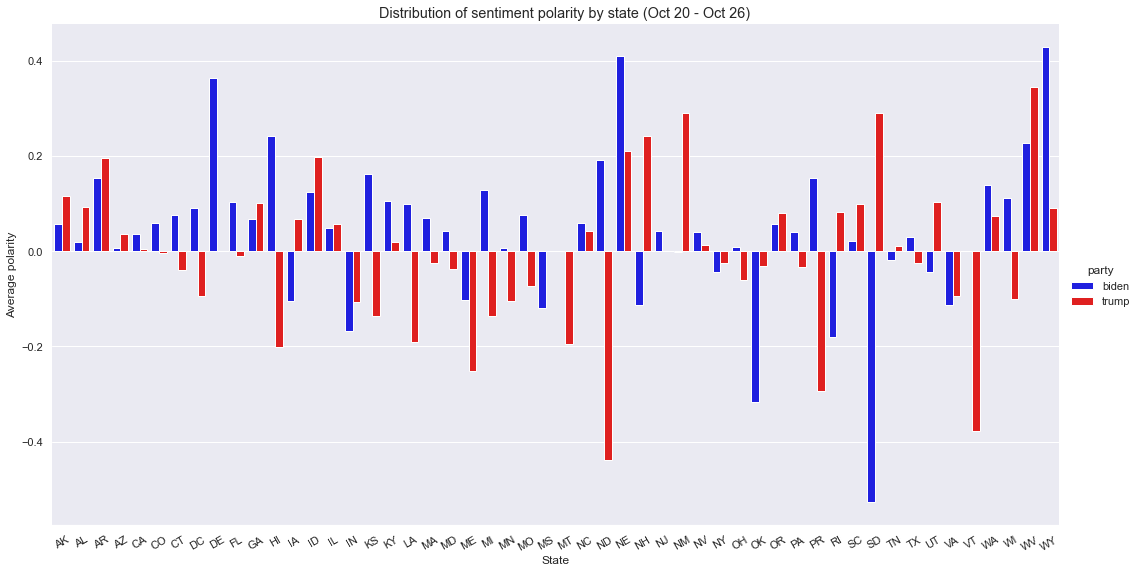

In [147]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week2_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of sentiment polarity by state (Oct 20 - Oct 26)')

Text(0.5, 0.98, 'Distribution of sentiment polarity by state (Oct 27 - Nov 3)')

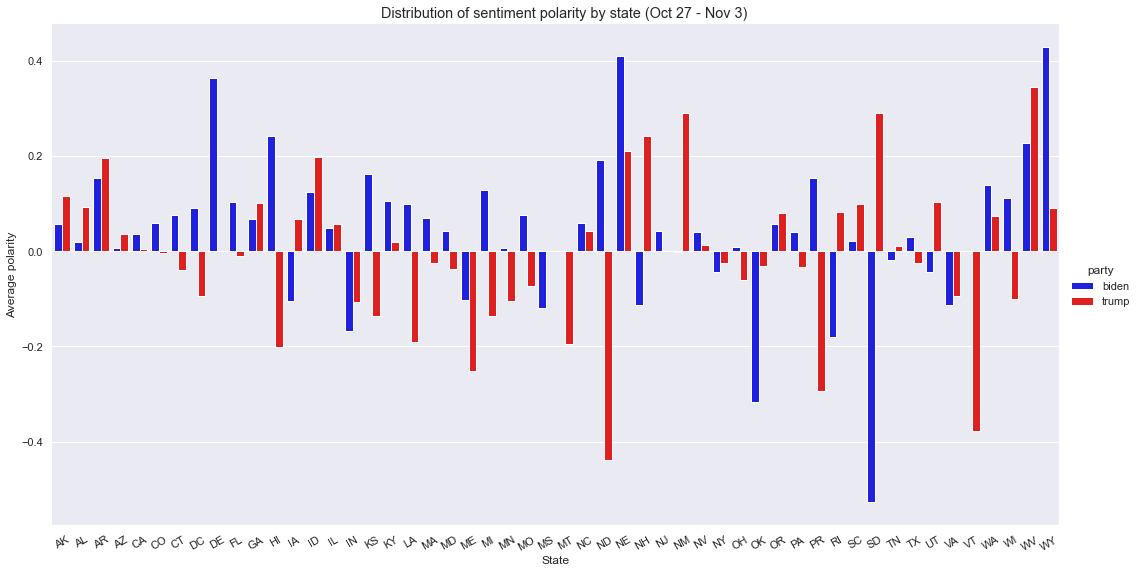

In [148]:
colors = ['#0000FF', '#FF0000']
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(data = week2_state, 
               kind = 'bar', 
               x = 'state_code', y = 'vader_polarity', hue = 'ds', 
               height=8, aspect=15/8)
g.despine(left=True)
g.set_axis_labels('State', 'Average polarity')
g._legend.set_title('party')
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Distribution of sentiment polarity by state (Oct 27 - Nov 3)')